# Controlling the solver

In this example we look at the options for visualising and controlling the behaviour of the ODE solver used in Myokit's [Simulation](https://myokit.readthedocs.io/en/stable/api_simulations/Simulation.html) class.

The `myokit.Simulation` uses CVODES/BDF from the 
[Sundials](https://computing.llnl.gov/projects/sundials) suite of solvers (see [this technical note](../technical-notes/1-3-cvodes-simulation.ipynb) for more detailed information).
This 

blah blah blah

"variable-order" multistep method

n addition to adjusting the step size to meet the local error test, cvode periodically adjusts the
order, with the goal of maximizing the step size. The integration starts out at order 1 and varies the
order dynamically after that. The basic idea is to pick the order q for which a polynomial of order q
best fits the discrete data involved in the multistep method. However, if either a convergence failure
or an error test failure occurred on the step just completed, no change in step size or order is done.

stiff systems

adapts step size



## Visualising




[Decker et al. 2009](https://doi.org/10.1152/ajpheart.01216.2008) model of the canine ventricular AP
Copy [here](./models/c)

In [1]:
import myokit

# Load a model, protocol, and script
m, p, _ = myokit.load('models/c/decker-2009.mmt')

# Add extra variables to log the number of evaluations and the time passed
e = m.get('engine')

v = e.add_variable('realtime')
v.set_rhs(0)
v.set_binding('realtime')

v = e.add_variable('evaluations')
v.set_rhs(0)
v.set_binding('evaluations')

# Run a simulation
s = myokit.Simulation(m, p)
d = s.run(1000)


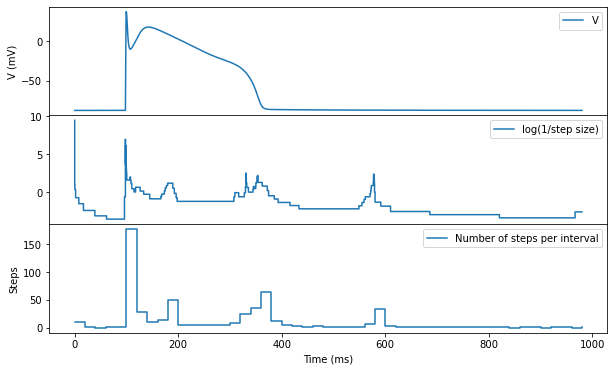

In [2]:
import matplotlib.pyplot as plt
import myokit.lib.plots as plots

# Draw an action potential
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.ylabel('V (mV)')
plt.plot(d['engine.time'], d['membrane.V'], label='V')
plt.legend()

# Show the "load" on the solver by plotting log(1 / step size)
plt.subplot(3, 1, 2)
plots.simulation_times(time=d['engine.time'], mode='load')
plt.legend(['log(1/step size)'])

# Show the step size over time
plt.subplot(3, 1, 3)
plt.xlabel('Time (ms)')
plt.ylabel('Steps')
plots.simulation_times(time=d['engine.time'], mode='histo', nbuckets=50)
plt.legend(['Number of steps per interval'])

plt.subplots_adjust(hspace=0)
plt.show()

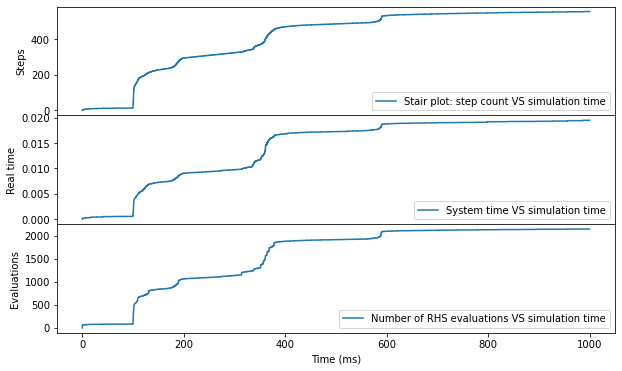

In [3]:
plt.figure(figsize=(10, 6))

# Show how many steps have been taken at each point in simulated time
plt.subplot(3, 1, 1)
plt.ylabel('Steps')
plots.simulation_times(time=d['engine.time'], mode='stair')
plt.legend(['Stair plot: step count VS simulation time'])

# Show the elapsed system time at each point in simulated time
plt.subplot(3, 1, 2)
plt.ylabel('Real time')
plt.step(d['engine.time'], d['engine.realtime'])
plt.legend(['System time VS simulation time'], loc='lower right')

# Show the number of right-hand side evaluations at each point in simulated time.
plt.subplot(3, 1, 3)
plt.xlabel('Time (ms)')
plt.ylabel('Evaluations')
plt.step(d['engine.time'], d['engine.evaluations'])
plt.legend(['Number of RHS evaluations VS simulation time'])

plt.subplots_adjust(hspace=0)
plt.show()

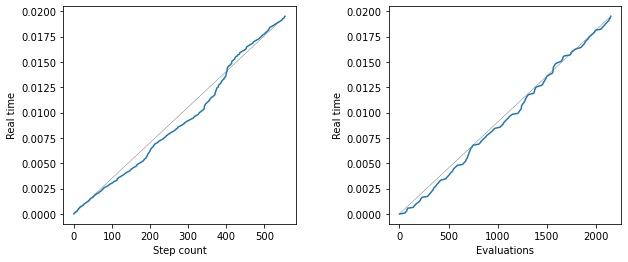

In [4]:
plt.figure(figsize=(10, 4))

# Show how many steps have been taken at each point in simulated time
plt.subplot(1, 2, 1)
plt.xlabel('Step count')
plt.ylabel('Real time')
m = len(d['engine.realtime'])
n = d['engine.realtime'][-1]
plt.plot([0, m], [0, n], 'k', lw=0.5, alpha=0.5)
plt.plot(d['engine.realtime'])

# Show the elapsed system time at each point in simulated time
plt.subplot(1, 2, 2)
plt.xlabel('Evaluations')
plt.ylabel('Real time')
m = d['engine.evaluations'][-1]
n = d['engine.realtime'][-1]
plt.plot([0, m], [0, n], 'k', lw=0.5, alpha=0.5)
plt.plot(d['engine.evaluations'], d['engine.realtime'])

plt.subplots_adjust(wspace=0.4)
plt.show()

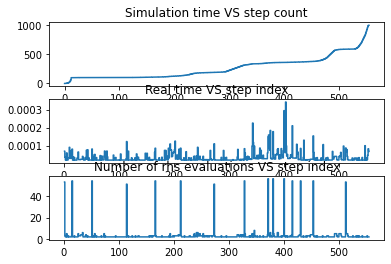

In [5]:
# Figure 3: Step counts
plt.figure()
# Show the simulated time versus the number of steps taken
plt.subplot(311)
plots.simulation_times(time=d['engine.time'], mode='stair_inverse')
plt.title('Simulation time VS step count')
# Show the system time taken to take each (simulation) time step
plt.subplot(312)
plots.simulation_times(realtime=d['engine.realtime'], mode='time_per_step')
plt.title('Real time VS step index')
# Show the number of RHS evaluations taken for each time step
plt.subplot(313)
plots.simulation_times(evaluations=d['engine.evaluations'], mode='eval_per_step')
plt.title('Number of rhs evaluations VS step index')
plt.show()

.....

## Controlling

## Simulation errors

## Parameter fitting